**Data Exploration**

In [1]:
import pandas as pd 
import numpy as np 
import cv2
import PIL
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

In [2]:
breast_img = glob.glob('data/**/*.png', recursive = True)

In [3]:
for imgname in breast_img[:3]:
    print(imgname)

data\10253\0\10253_idx5_x1001_y1001_class0.png
data\10253\0\10253_idx5_x1001_y1051_class0.png
data\10253\0\10253_idx5_x1001_y1101_class0.png


In [4]:
non_can_img = []
can_img = []

for img in breast_img:
    if img[-5] == '0' :
        non_can_img.append(img)
    
    elif img[-5] == '1' :
        can_img.append(img)

In [5]:
non_can_num = len(non_can_img)  # No cancer
can_num = len(can_img)   # Cancer 
        
total_img_num = non_can_num + can_num
        
print('Number of Images of no cancer: {}' .format(non_can_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(can_num))   # images of cancer 
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 397476
Number of Images of cancer : 157572
Total Number of Images : 555048


In [6]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of Patients' : [198738,78786]})

In [7]:
bar = px.bar(data_frame=data_insight_1, x = 'state of cancer', y='Numbers of Patients', color='state of cancer')
bar.update_layout(title_text='Number of Patients with cancer (1) and patients with no cancer (0)', title_x=0.5)
bar.show()

from breast-histopathology-images Dataset , we coclude that from the above chart that : **Cases with No cancer (0) is more than Cases with cancer(1)**

**Data Modeling**

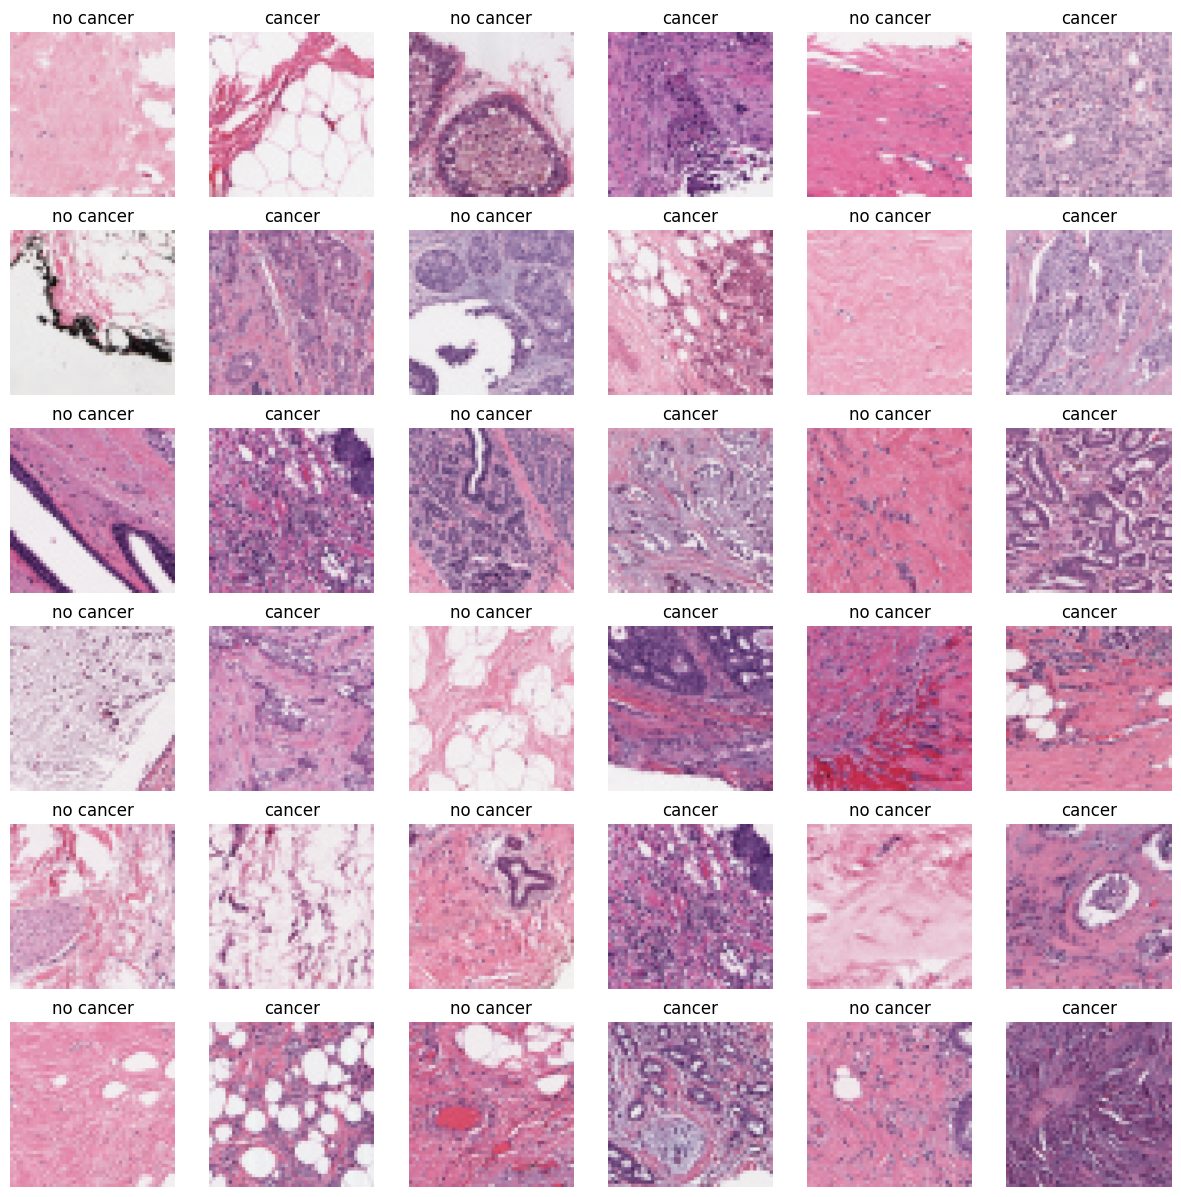

In [8]:
from keras.preprocessing import image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_can_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:
    
        img = image.load_img((non_can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in some_can:
    
        img = image.load_img((can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

In [9]:
from matplotlib.image import imread
import cv2

some_non_img = random.sample(non_can_img, len(non_can_img))
some_can_img = random.sample(can_img, len(can_img))

non_img_arr = []
can_img_arr = []

for img in some_non_img:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in some_can_img:
    
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [10]:
# X = []
# y = []

# breast_img_arr = np.concatenate((non_img_arr, can_img_arr),dtype=object)
# random.shuffle(breast_img_arr)

# for feature, label in breast_img_arr:
#     X.append(feature)
#     y.append(label)
    
# X = np.array(X)
# y = np.array(y)

# print('X shape : {}' .format(X.shape))

# Example preprocessing to ensure the same shape
def preprocess(arr):
    return np.array(arr, dtype=object)

non_img_arr = preprocess(non_img_arr)
can_img_arr = preprocess(can_img_arr)

# Now concatenate and proceed as before
breast_img_arr = np.concatenate((non_img_arr, can_img_arr), axis=0)
random.shuffle(breast_img_arr)

# Separate features and labels
X = []
y = []

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

print('X shape : {}'.format(X.shape))
print('y shape : {}'.format(y.shape))


X shape : (555048, 50, 50, 3)
y shape : (555048,)


In [11]:
# from sklearn.model_selection import train_test_split
# from keras.utils.np_utils import to_categorical

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# rate = 0.5
# num = int(X.shape[0] * rate)

# y_train = to_categorical(y_train, 2)
# y_test = to_categorical(y_test, 2)


# print('X_train shape : {}' .format(X_train.shape))
# print('X_test shape : {}' .format(X_test.shape))
# print('y_train shape : {}' .format(y_train.shape))
# print('y_test shape : {}' .format(y_test.shape))


from sklearn.model_selection import train_test_split

# Use one of the following imports based on your setup
# from keras.utils import to_categorical  # For Keras standalone
from tensorflow.keras.utils import to_categorical  # For TensorFlow's Keras

# Assuming X and y are already defined and preprocessed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rate = 0.5
num = int(X.shape[0] * rate)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

print('X_train shape : {}'.format(X_train.shape))
print('X_test shape : {}'.format(X_test.shape))
print('y_train shape : {}'.format(y_train.shape))
print('y_test shape : {}'.format(y_test.shape))


X_train shape : (416286, 50, 50, 3)
X_test shape : (138762, 50, 50, 3)
y_train shape : (416286, 2)
y_test shape : (138762, 2)


In [12]:
import tensorflow as tf 
tf.random.set_seed(100)

In [13]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)),
tf.keras.layers.MaxPooling2D(strides = 2),
tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides = 2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(2, activation = 'softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 128)         0

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 41 , batch_size = 75)

Epoch 1/41


5551/5551 [==============================] - 466s 83ms/step - loss: 0.1545 - accuracy: 0.9556 - val_loss: 0.1319 - val_accuracy: 0.9554
Epoch 2/41
5551/5551 [==============================] - 464s 84ms/step - loss: 0.1273 - accuracy: 0.9571 - val_loss: 0.1269 - val_accuracy: 0.9581
Epoch 3/41
5551/5551 [==============================] - 447s 81ms/step - loss: 0.1223 - accuracy: 0.9585 - val_loss: 0.1221 - val_accuracy: 0.9586
Epoch 4/41
5551/5551 [==============================] - 432s 78ms/step - loss: 0.1202 - accuracy: 0.9589 - val_loss: 0.1189 - val_accuracy: 0.9596
Epoch 5/41
5551/5551 [==============================] - 480s 86ms/step - loss: 0.1165 - accuracy: 0.9600 - val_loss: 0.1233 - val_accuracy: 0.9587
Epoch 6/41
5551/5551 [==============================] - 494s 89ms/step - loss: 0.1146 - accuracy: 0.9607 - val_loss: 0.1134 - val_accuracy: 0.9615
Epoch 7/41
5551/5551 [==============================] - 482s 87ms/step - loss: 0.1147 - accuracy: 0.9609 - val_loss:

In [17]:
model.evaluate(X_test,y_test)

4337/4337 [==============================] - 40s 9ms/step - loss: 0.1144 - accuracy: 0.9666


[0.11442616581916809, 0.966568648815155]

4337/4337 [==============================] - 41s 9ms/step


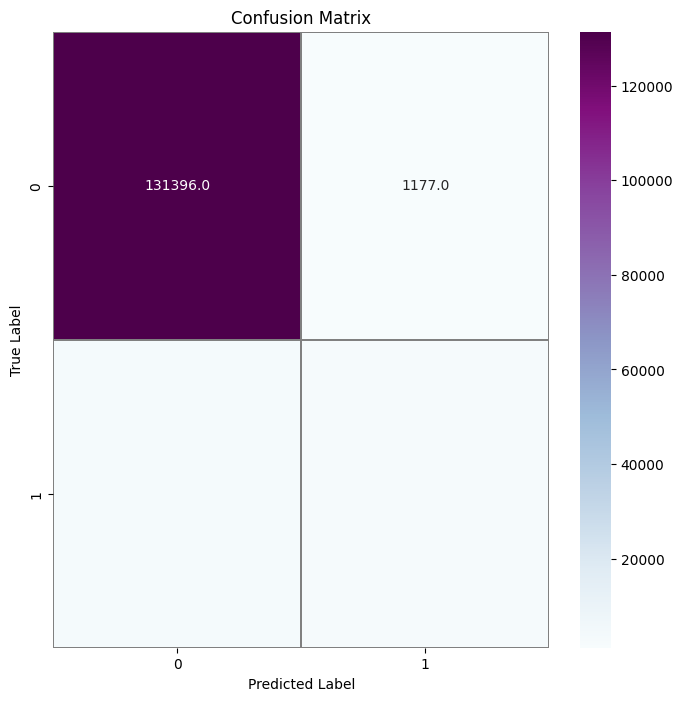

In [18]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

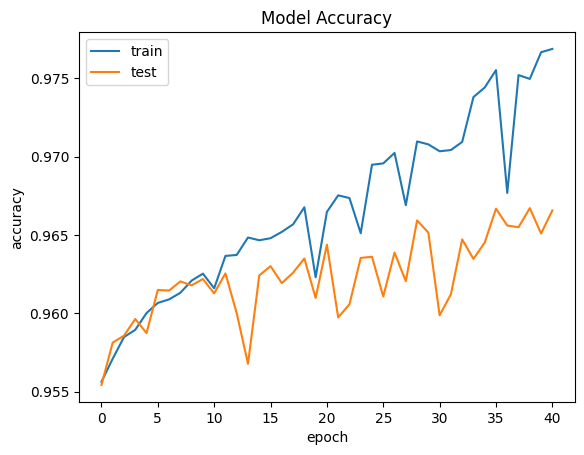

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

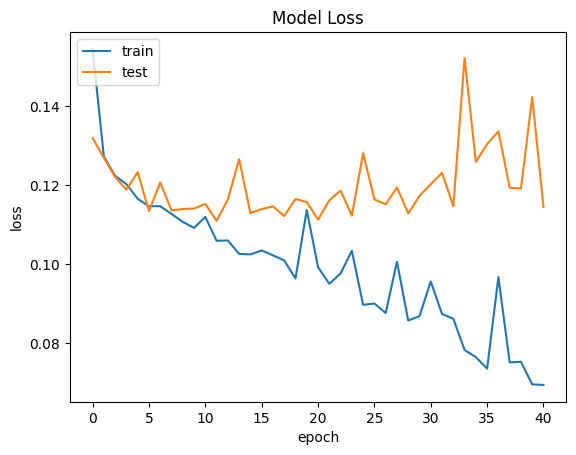

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
prediction = model.predict(X_test)
prediction

4337/4337 [==============================] - 46s 11ms/step


array([[9.9997926e-01, 2.0777286e-05],
       [9.9999964e-01, 4.0591831e-07],
       [1.0000000e+00, 8.7549664e-29],
       ...,
       [1.0000000e+00, 8.7911241e-11],
       [1.0000000e+00, 3.3528412e-08],
       [1.0000000e+00, 4.6658879e-33]], dtype=float32)

In [22]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

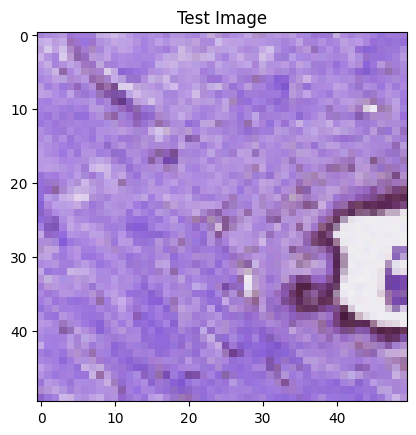

In [23]:
index = 90
img_plot(X_test, index)

In [24]:
input = X_test[index:index+1]

In [25]:
pred = model.predict(input)[0].argmax()
label = y_test[index].argmax()

1/1 [==============================] - 0s 102ms/step


In [26]:
print('Predicted Value using  cnn model',pred)
print("True Value",label)

Predicted Value using  cnn model 0
True Value 0


In [27]:
# Save the model
model.save_weights('./checkpoints/my_checkpoint')

# Create a new model instance
#model = create_model()

# Restore the weights
#model.load_weights('./checkpoints/my_checkpoint')


In [28]:
# Assuming 'model' is your trained model
model.save('my_model.h5')


c:\Users\sweet\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [31]:
"""
import cv2
import os
import glob
import tensorflow as tf
"""


def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (50, 50), interpolation=cv2.INTER_LINEAR)
    img = img / 255.0
    return img.reshape((1, 50, 50, 3))

def predict_on_dataset(model, img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)[0].argmax()
    return prediction

def make_predictions_on_cbis_dataset(model, cbis_dataset_path):
    breast_img = glob.glob(os.path.join(cbis_dataset_path, '*', '.jpg'), recursive=True)
    predictions = []
    for img_path in breast_img:
        predicted_class = predict_on_dataset(model, img_path)
        predictions.append(predicted_class)
    return predictions

loaded_model = model #replace her model here

# cbis_dataset_path = 'c:\Users\sweet\Desktop\class 1 cancer.jpg' #replace path
cbis_dataset_path = 'c:\\Users\\sweet\\Desktop\\class 1 cancer.jpg'


# Get predictions for all images
all_predictions = make_predictions_on_cbis_dataset(loaded_model, cbis_dataset_path)

# Display the predictions
print(all_predictions)

[]
